In [ ]:
from pathlib import Path
import os, sys
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Making the reference masks

Reference map tile is `213405`, from both 1965 and 1984. From these maps, all classes were manually annotated by human experts to use as training and validation data. All reference masks are stored as separate files, so we first merge them into a single file that has encoding

1. Fields
2. Marshes
3. Roads
4. Streams and ditches
5. Water bodies and rivers

<img src='nb_figures/arable_land_classes.png'>

**Fields** contains the top-left class from above image, "Pellot", in this work.

<img src='nb_figures/marsh_classes.PNG'>

The classes that indicate marshes or swamps are

* Marshy land ("Soistuva maa", top row)
* Tree-covered marsh, easy to cross ("Metsäinen suo, helppokulkuinen", middle row, left)
* Open marsh, easy to cross ("Aukea suo, helppokulkuinen", middle row, right)
* Hard to cross open marsh ("Vaikeakulkuinen aukea suo", bottom row, left)
* Insurmountable open marsh ("Ylitsepääsemätön aukea suo", bottom row, right)

In this work, **Marshes** contain all the classes aside from marshy land.

<img src='nb_figures/road_classes.png'>

**Roads** contain all of the above classes that indicate paved roads.

<img src='nb_figures/ditch_classes.PNG'>

**Streams and ditches** contains the above classes:

* Stream, width 5...2m ("Puro, leveys 5...2m", top row)
* Stream or ditch, width less than 2 meters ("Puro tai oja, alle 2m", bottom row)

<img src='nb_figures/river_classes.PNG'>

**Water bodies and rivers** contains the class pictured above: Rivers, width 20...5m ("Joki, leveys 20...5m") as well as all water bodies marked as large blue areas.

## 1965

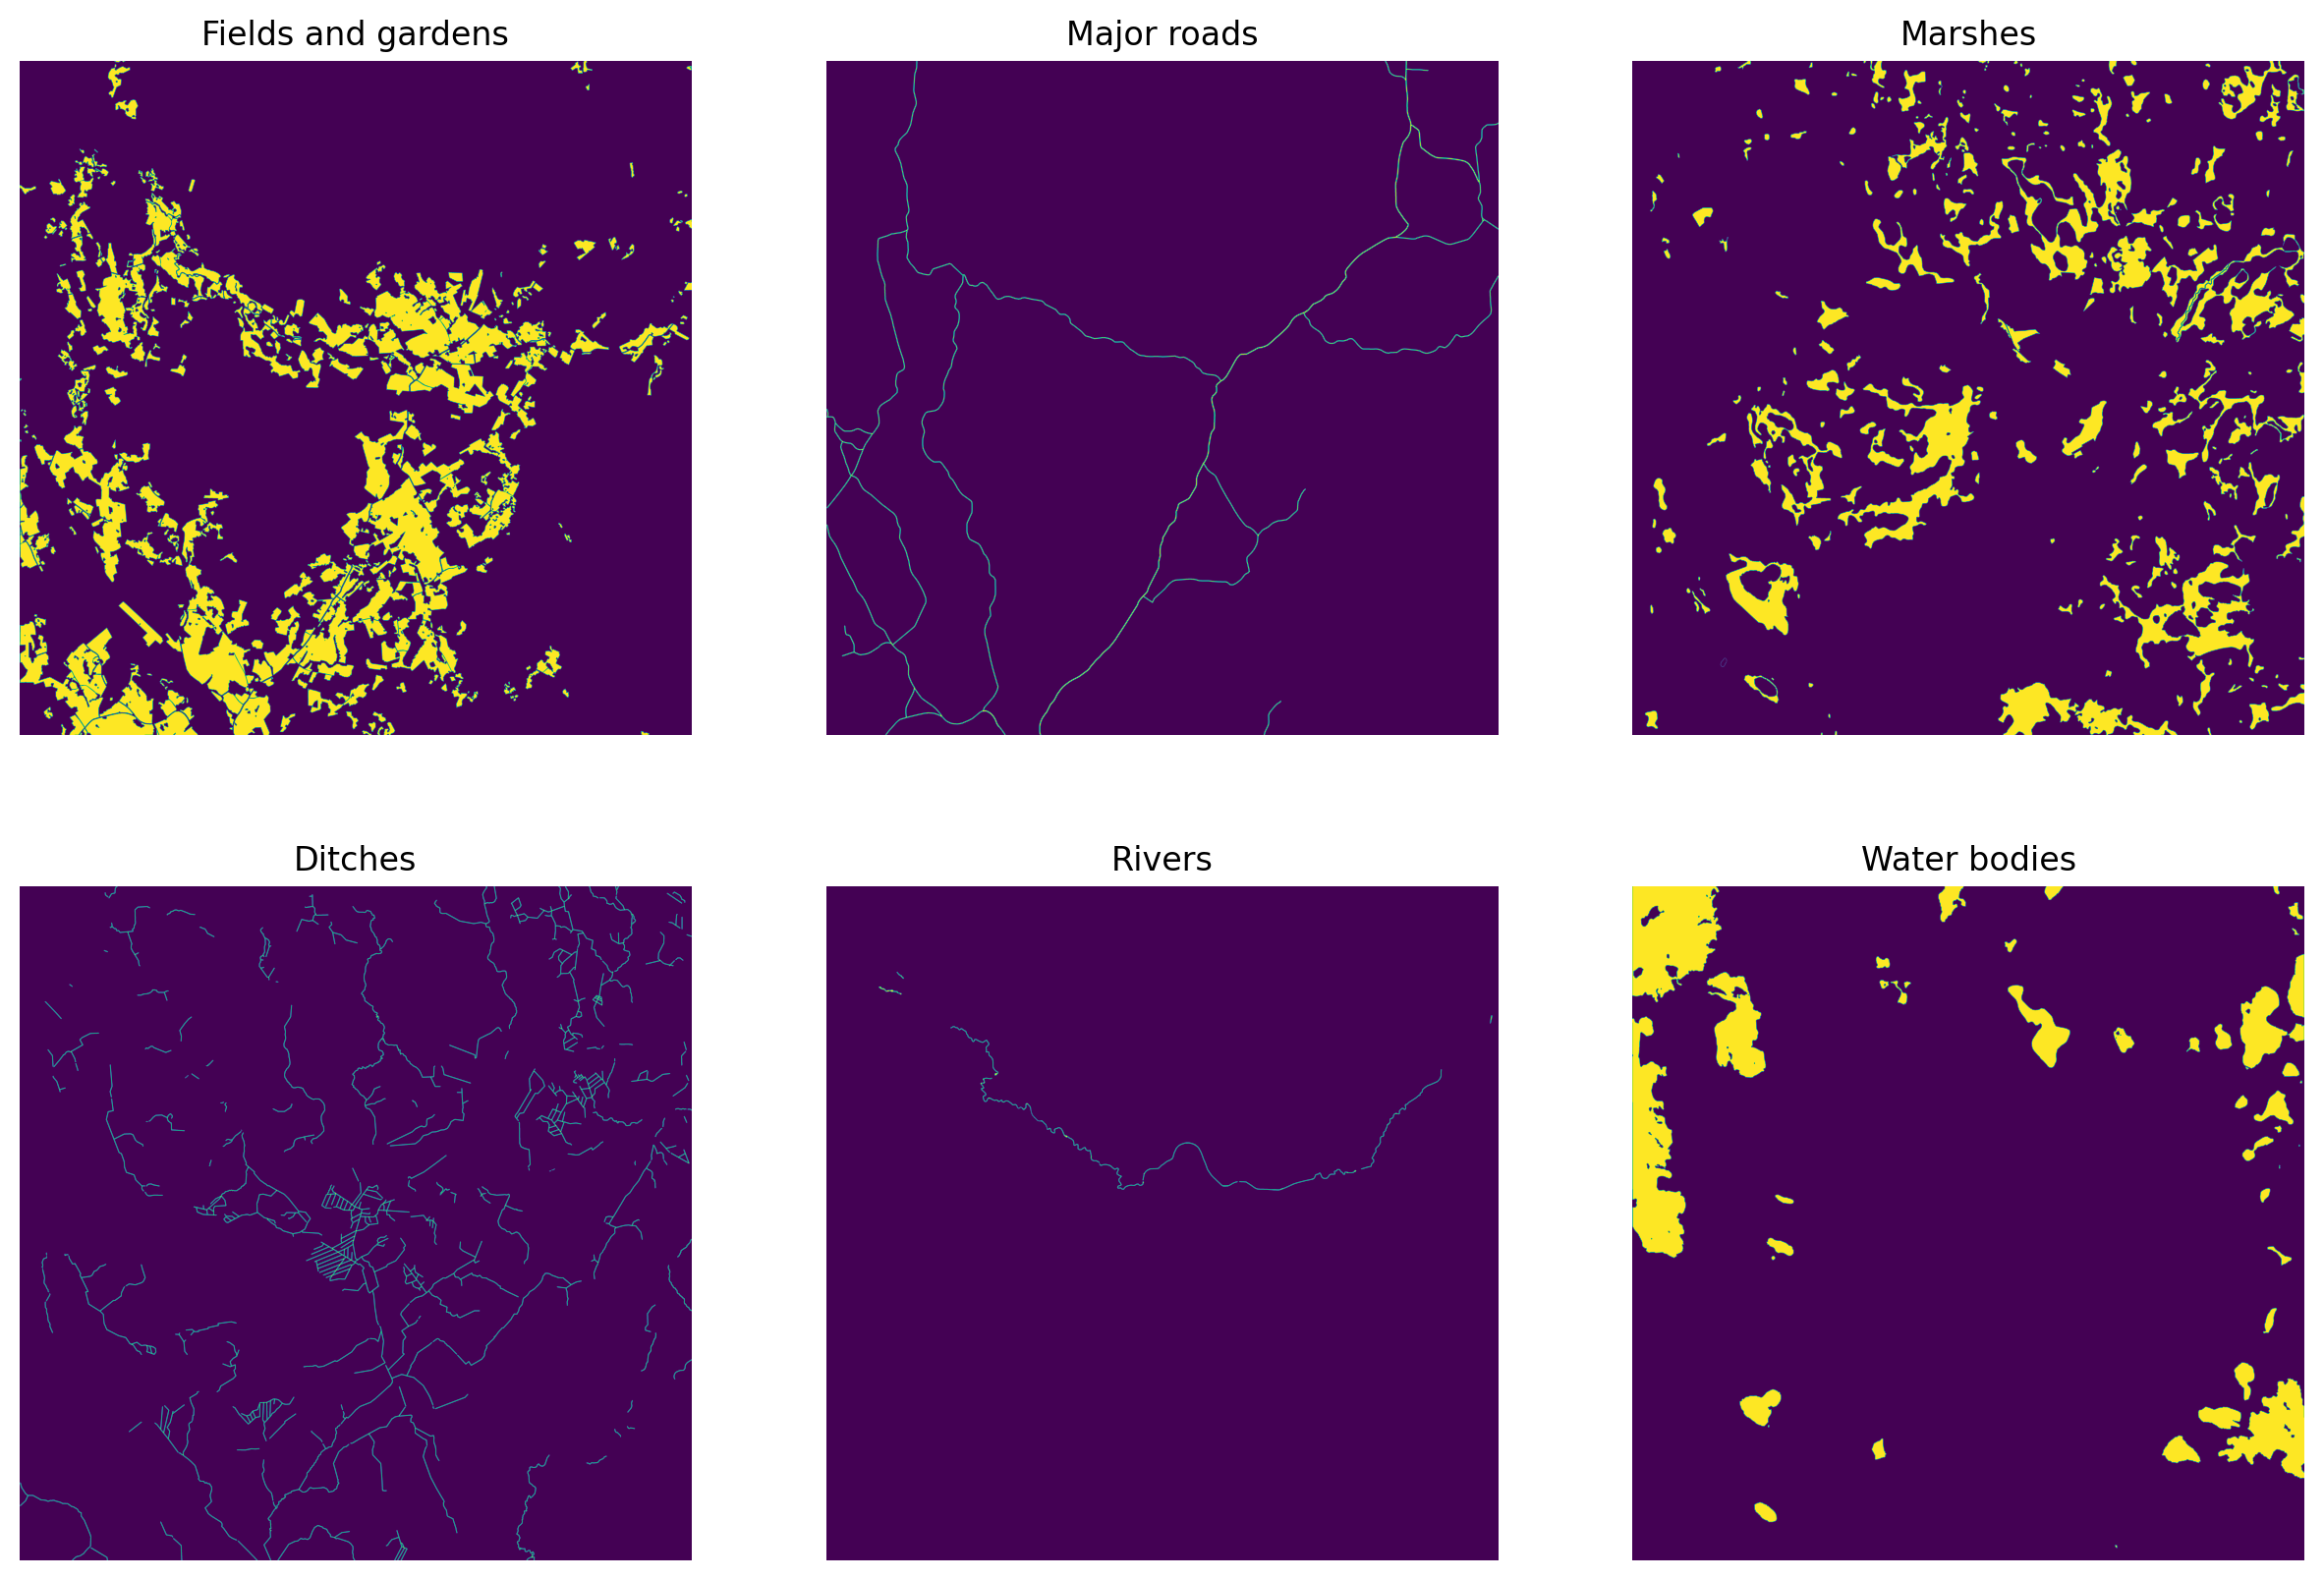

In [ ]:
ref_path = Path('../data/reference_masks')
fields = cv2.imread(str(ref_path/'1965/fields.png'), cv2.IMREAD_UNCHANGED)
water_bodies = cv2.imread(str(ref_path/'1965/lakes.png'), cv2.IMREAD_UNCHANGED)
rivers = cv2.imread(str(ref_path/'1965/rivers.png'), cv2.IMREAD_UNCHANGED)
ditches = cv2.imread(str(ref_path/'1965/ditches.png'), cv2.IMREAD_UNCHANGED)
roads = cv2.imread(str(ref_path/'1965/roads.png'), cv2.IMREAD_UNCHANGED)
marshes = cv2.imread(str(ref_path/'1965/marshes.png'), cv2.IMREAD_UNCHANGED)

waterways = ditches + rivers

fig, axs = plt.subplots(2,3, figsize=(15,10), dpi=200)
for a in axs.flatten(): a.axis('off')
axs[0,0].imshow(fields)
axs[0,0].set_title('Fields and gardens')
axs[0,1].imshow(roads)
axs[0,1].set_title('Major roads')
axs[0,2].set_title('Marshes')
axs[0,2].imshow(marshes)
axs[1,0].imshow(ditches)
axs[1,0].set_title('Ditches')
axs[1,1].imshow(rivers)
axs[1,1].set_title('Rivers')
axs[1,2].imshow(water_bodies)
axs[1,2].set_title('Water bodies')

plt.show()

Stack these into a single image and save it.

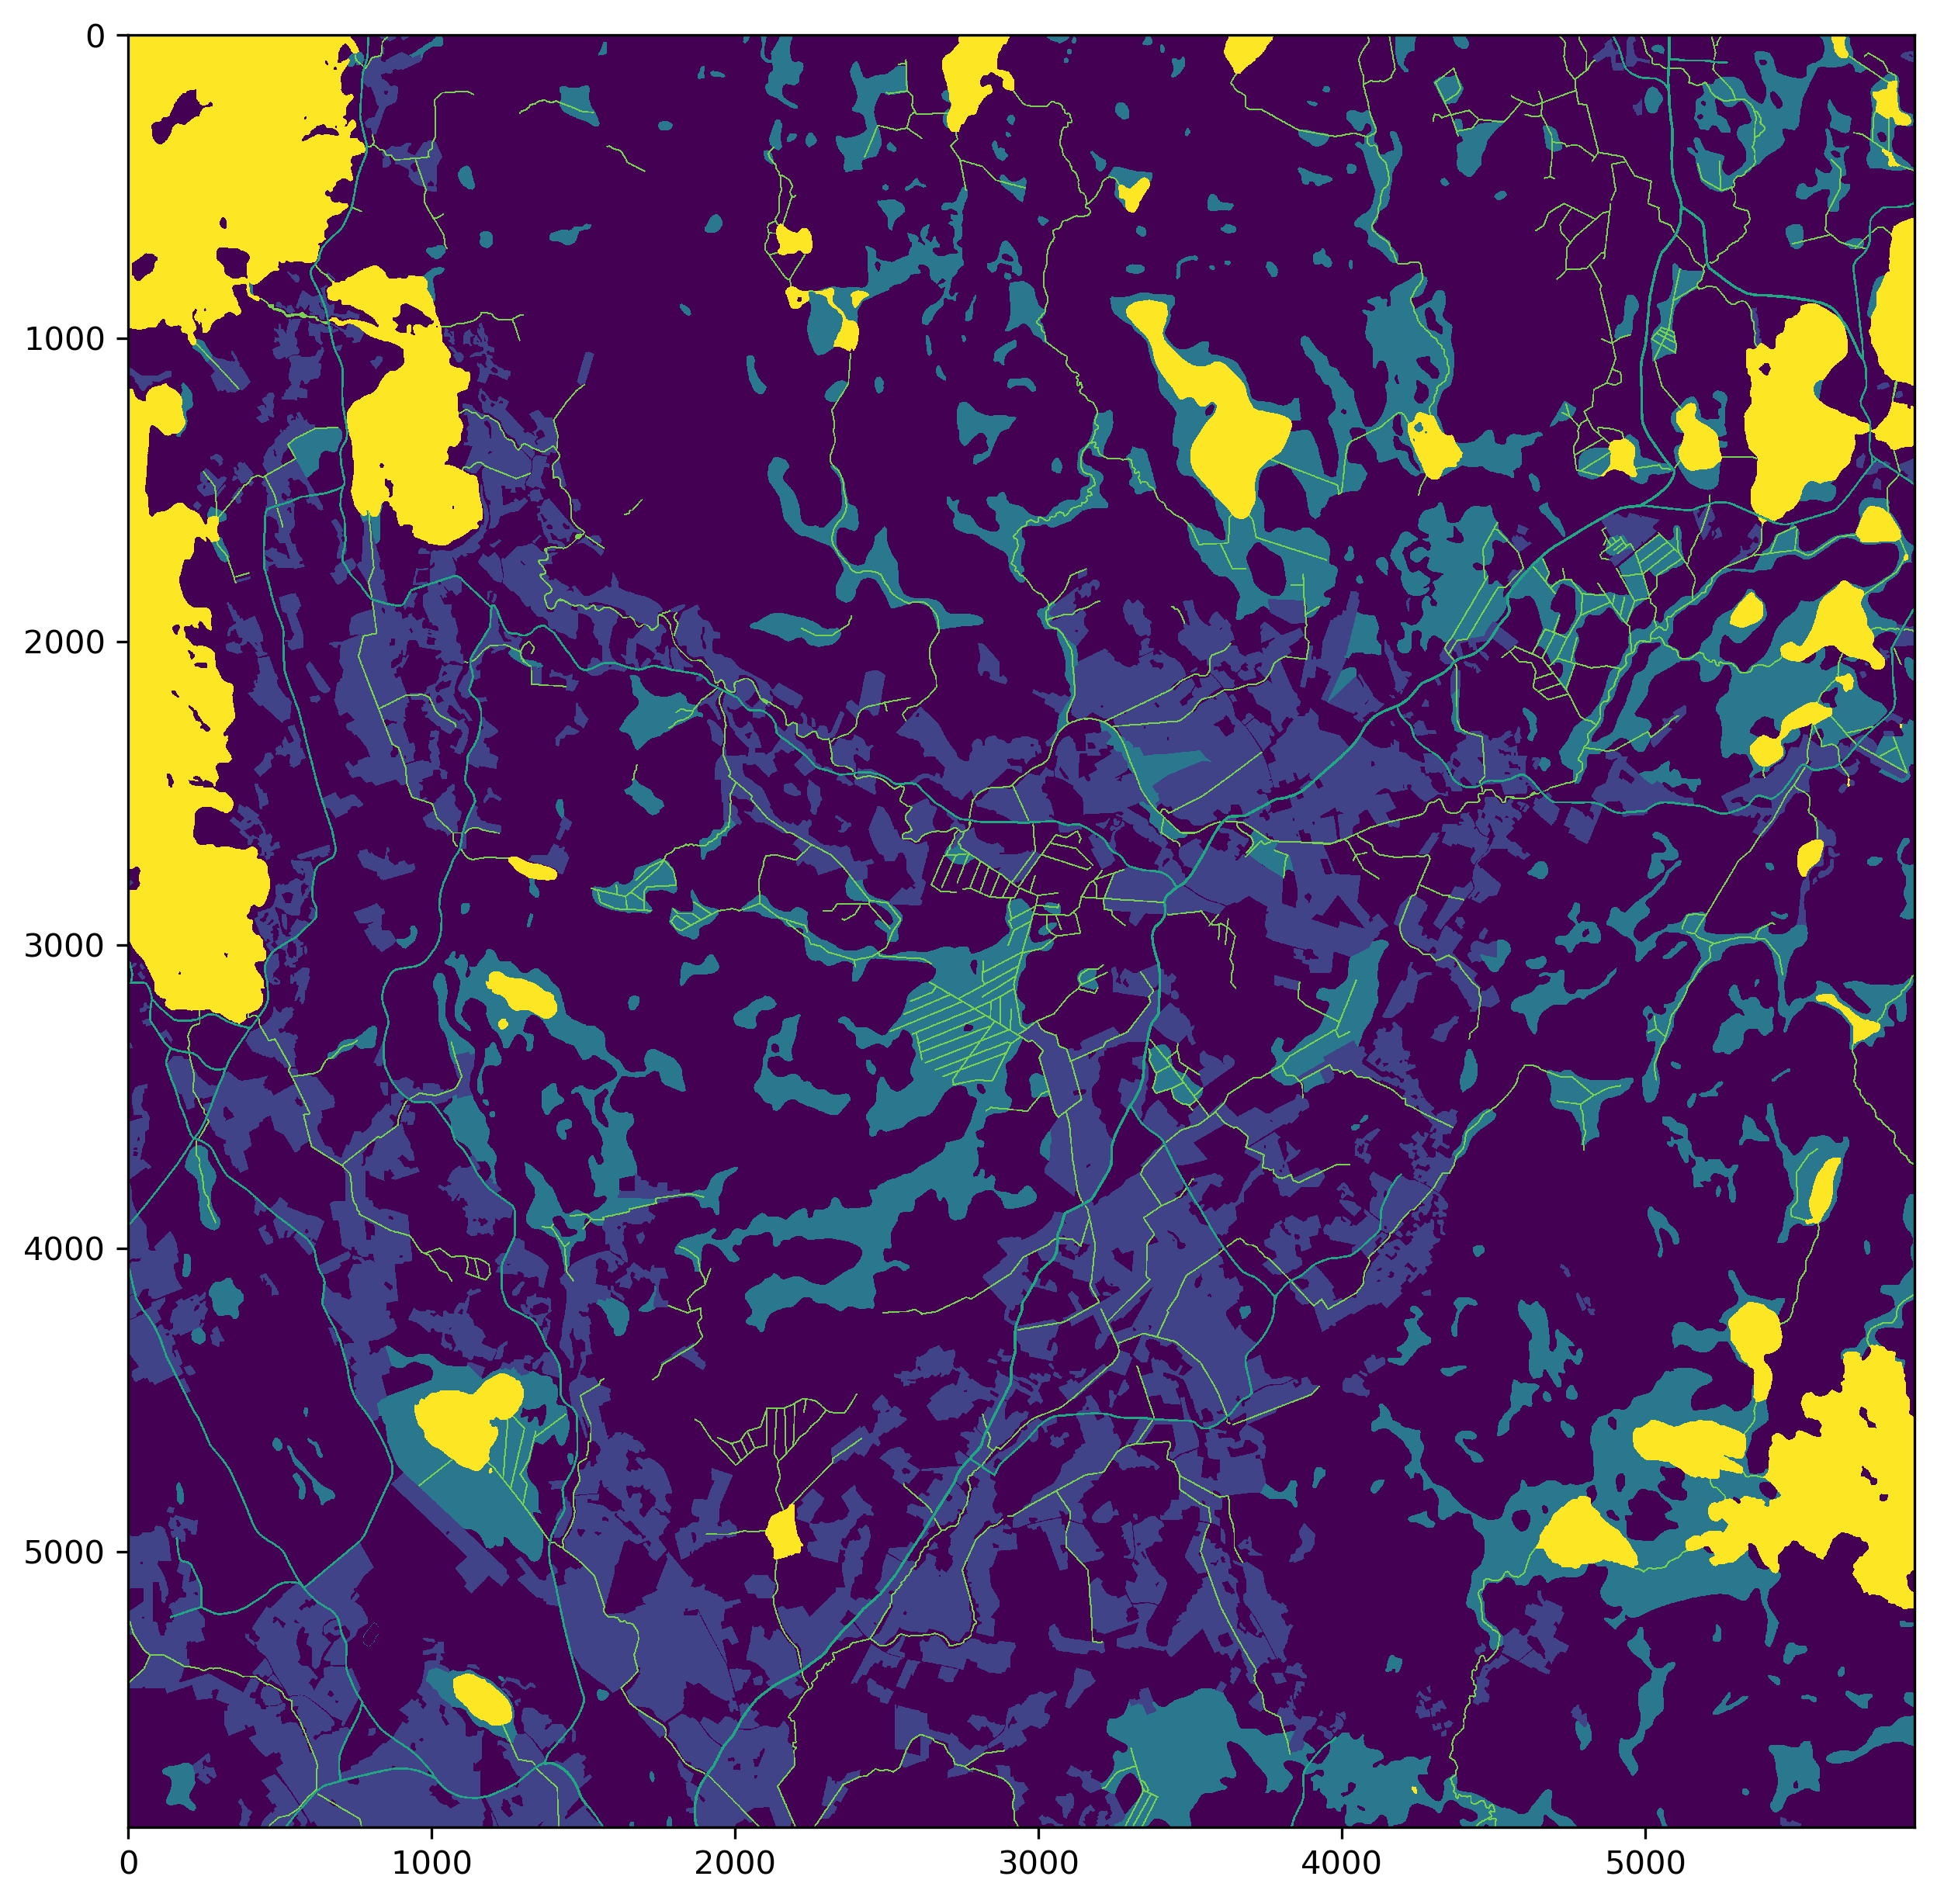

In [ ]:
outim = np.empty((fields.shape), np.uint8)
outim[fields > 0] = 1
outim[marshes > 0] = 2
outim[roads > 0] = 3
outim[waterways > 0] = 4
outim[water_bodies > 0] = 5
fig = plt.figure(figsize=(10,10), dpi=300)
plt.imshow(outim, vmin=0, vmax=5, interpolation='none')
cv2.imwrite(str(ref_path/'combined_mask_1965.png'), outim.astype('uint8'))
plt.show()

## 1984

Do the same for 1984.

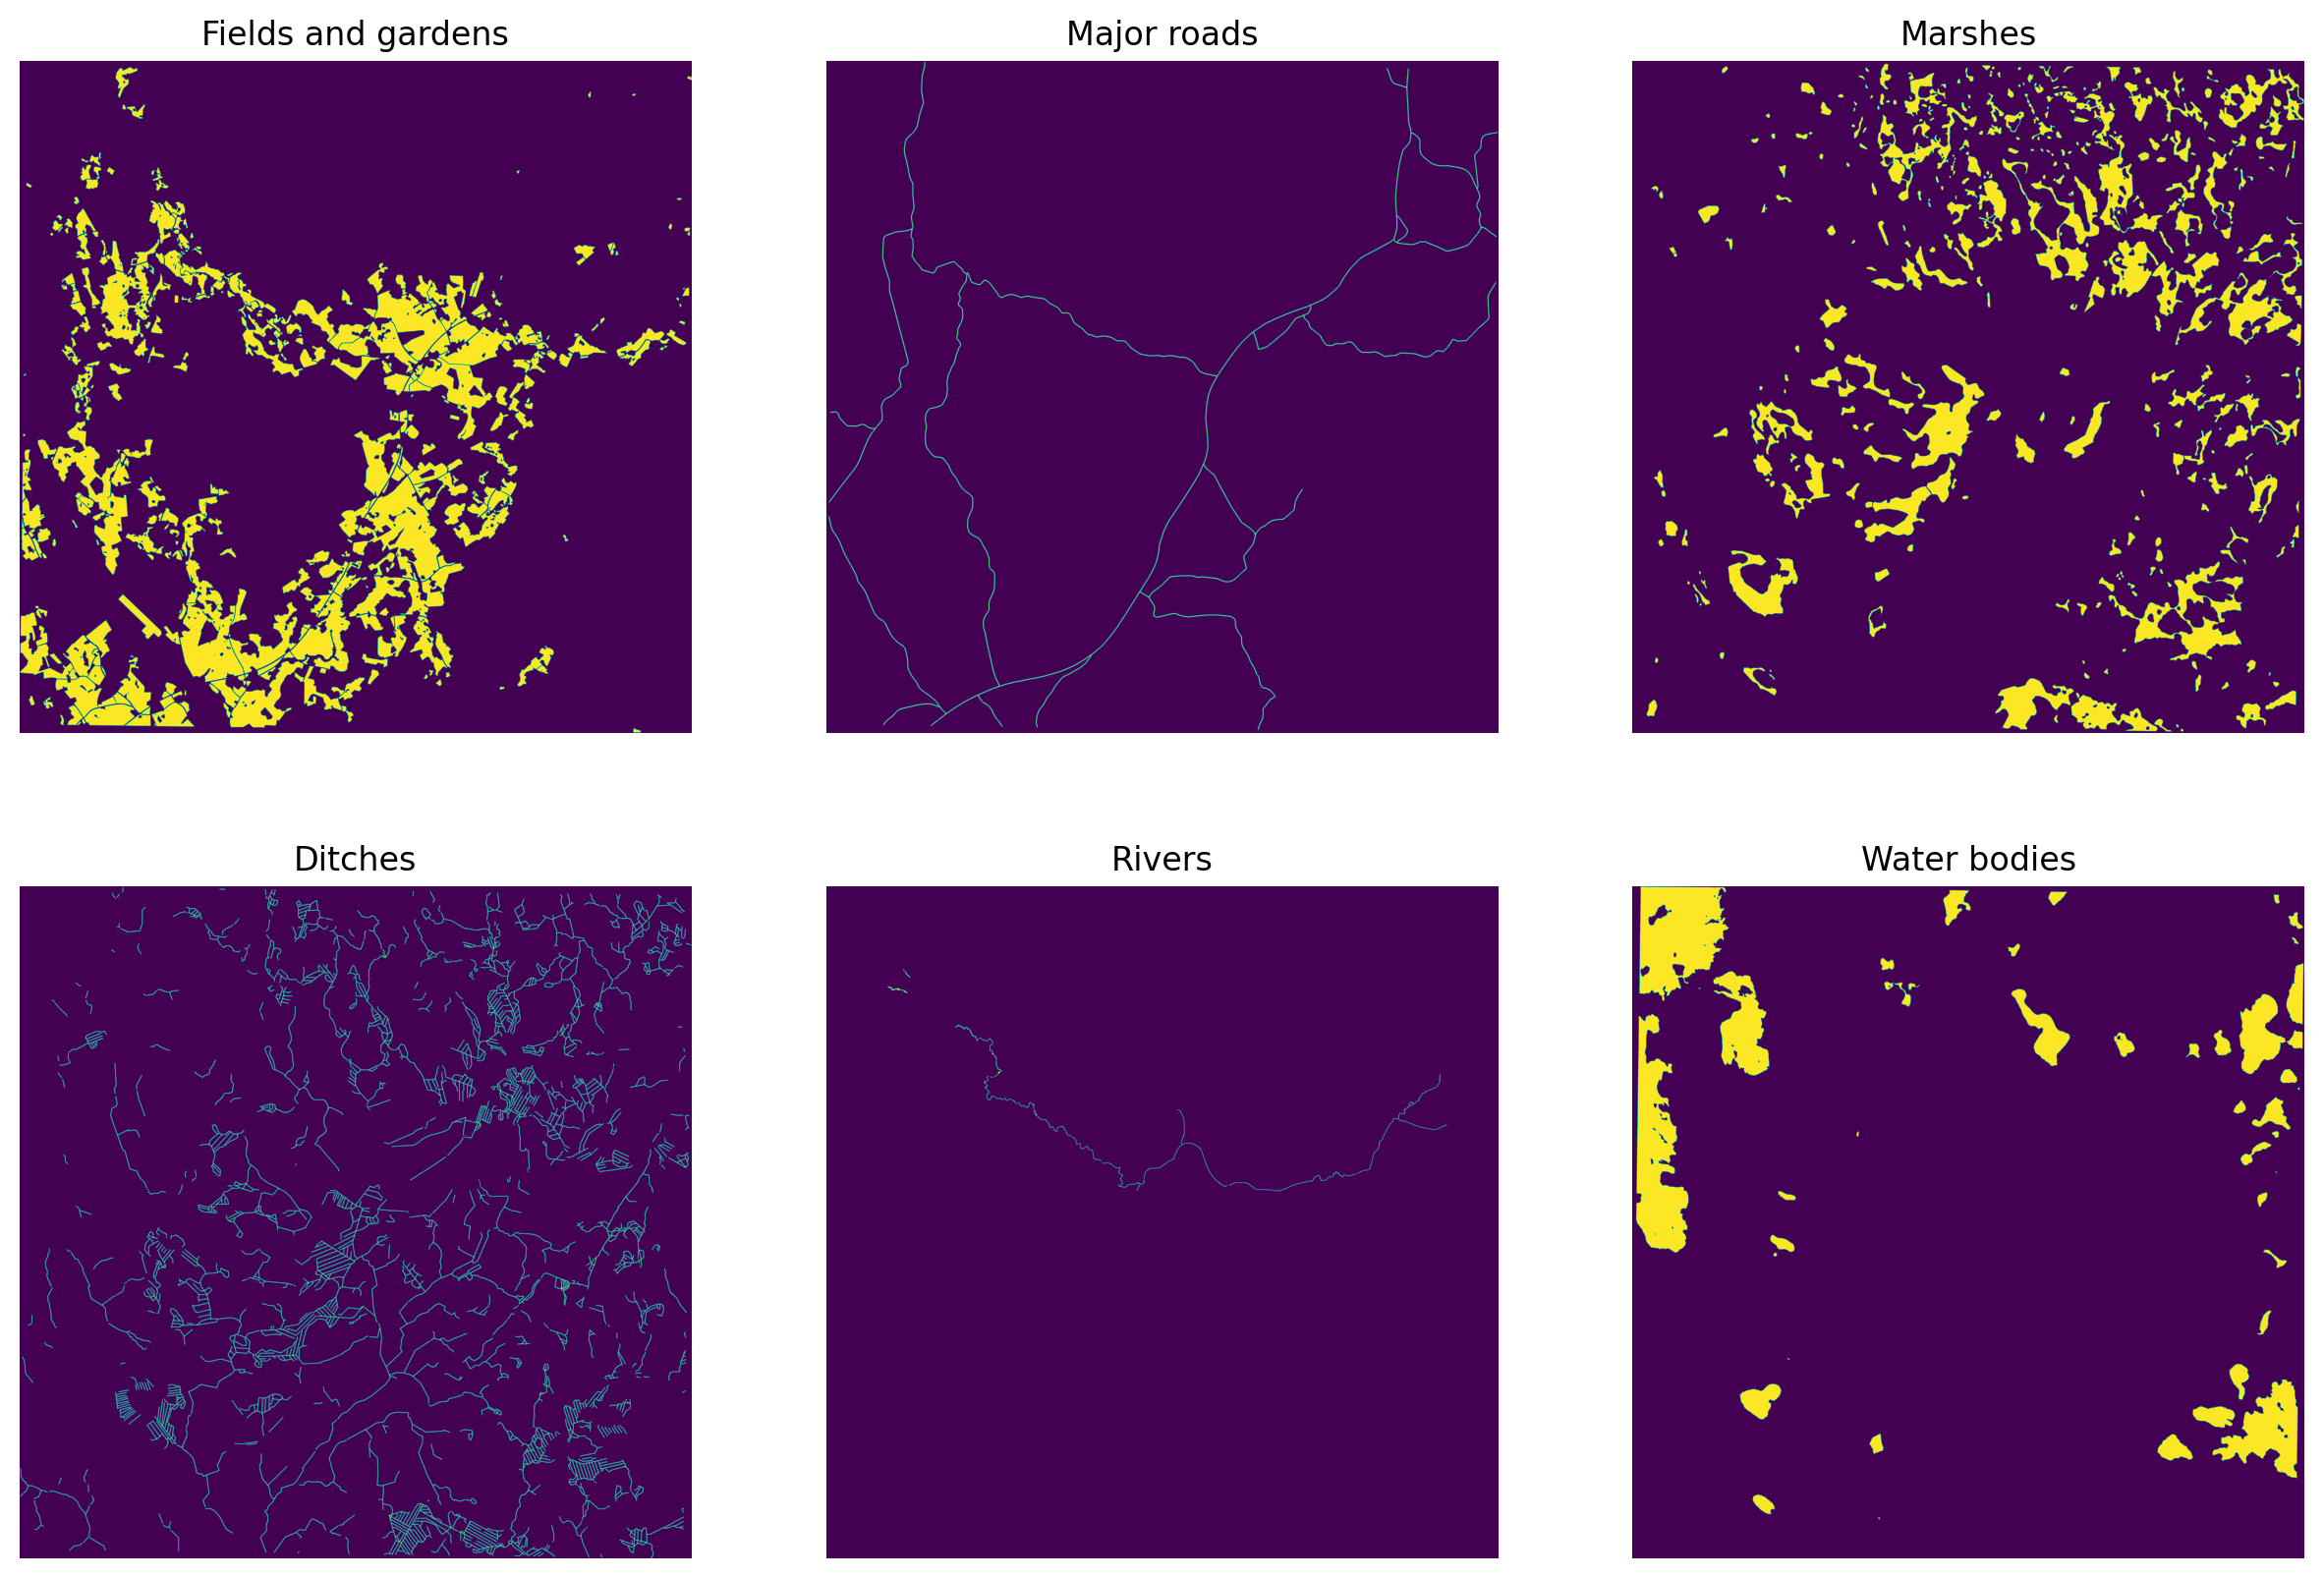

In [ ]:
ref_path = Path('../data/reference_masks')
fields = cv2.imread(str(ref_path/'1984/fields.png'), cv2.IMREAD_UNCHANGED)
water_bodies = cv2.imread(str(ref_path/'1984/lakes.png'), cv2.IMREAD_UNCHANGED)
rivers = cv2.imread(str(ref_path/'1984/rivers.png'), cv2.IMREAD_UNCHANGED)
ditches = cv2.imread(str(ref_path/'1984/ditches.png'), cv2.IMREAD_UNCHANGED)
roads = cv2.imread(str(ref_path/'1984/roads.png'), cv2.IMREAD_UNCHANGED)
marshes = cv2.imread(str(ref_path/'1984/marshes.png'), cv2.IMREAD_UNCHANGED)

waterways = ditches + rivers

fig, axs = plt.subplots(2,3, figsize=(15,10), dpi=200)
for a in axs.flatten(): a.axis('off')
axs[0,0].imshow(fields)
axs[0,0].set_title('Fields and gardens')
axs[0,1].imshow(roads)
axs[0,1].set_title('Major roads')
axs[0,2].set_title('Marshes')
axs[0,2].imshow(marshes)
axs[1,0].imshow(ditches)
axs[1,0].set_title('Ditches')
axs[1,1].imshow(rivers)
axs[1,1].set_title('Rivers')
axs[1,2].imshow(water_bodies)
axs[1,2].set_title('Water bodies')

plt.show()

Stack these into a single mask.

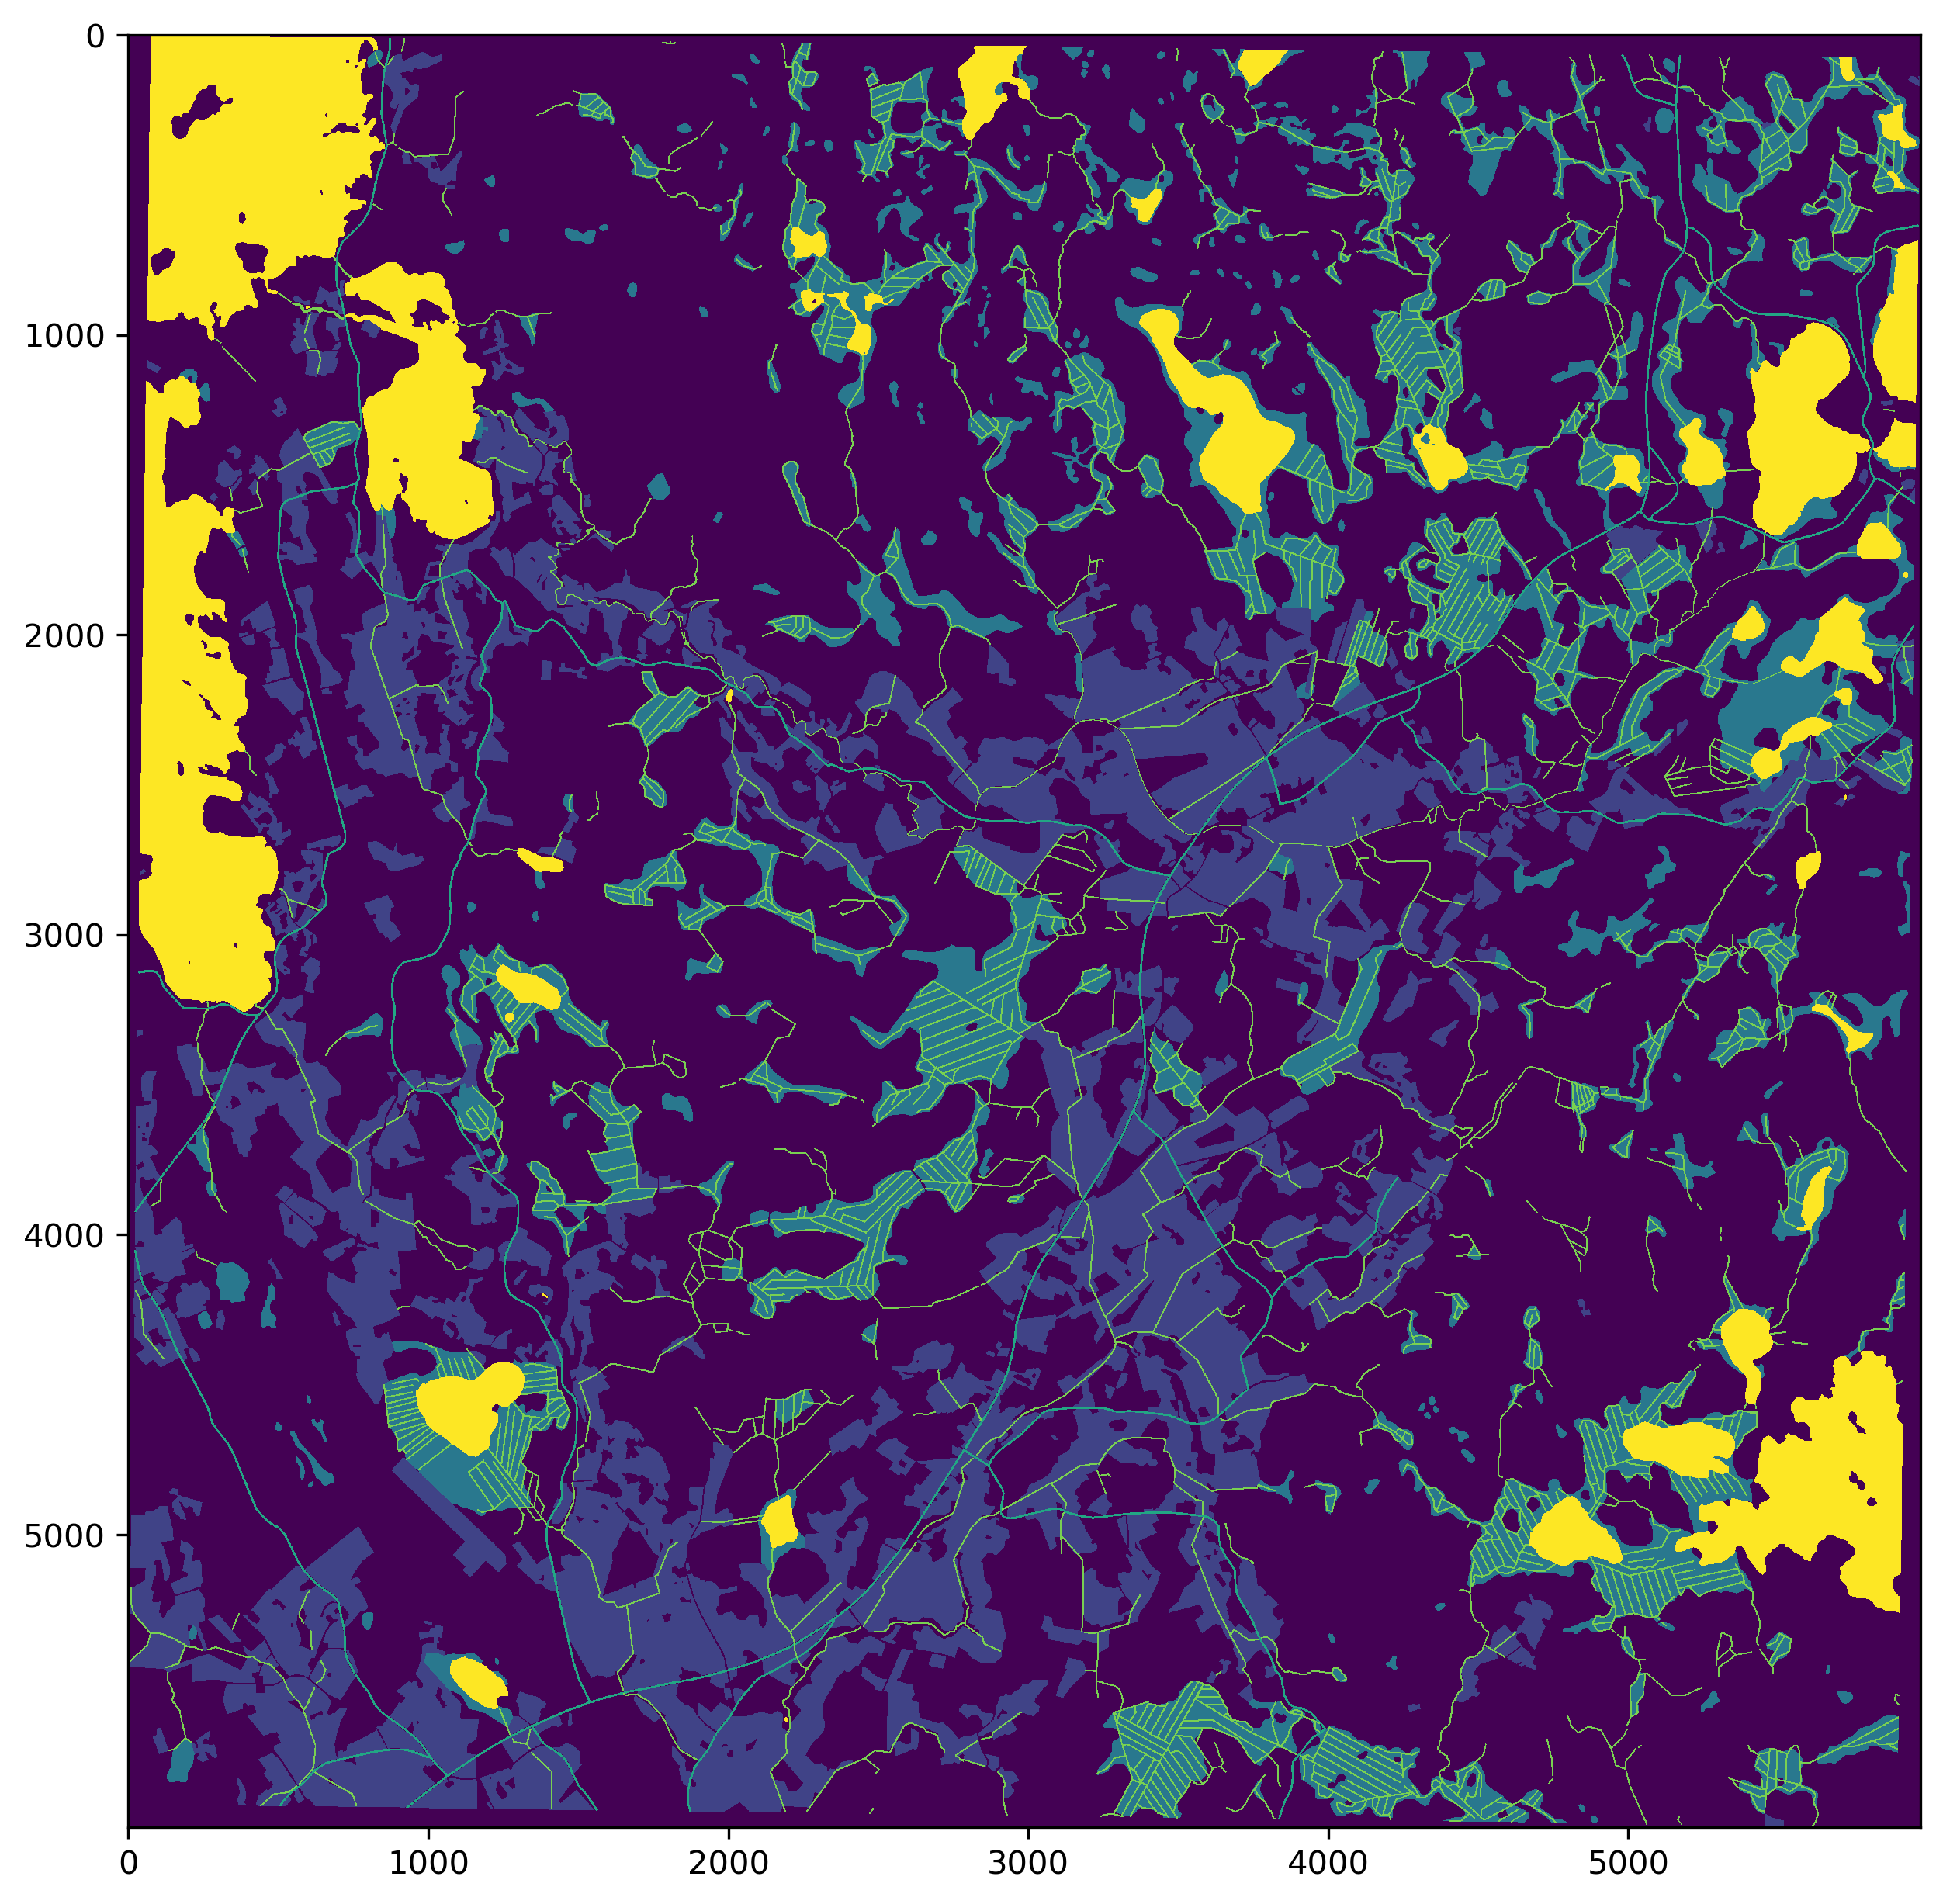

In [ ]:
outim = np.empty((fields.shape), np.uint8)
outim[fields > 0] = 1
outim[marshes > 0] = 2
outim[roads > 0] = 3
outim[waterways > 0] = 4
outim[water_bodies > 0] = 5
fig = plt.figure(figsize=(10,10), dpi=300)
plt.imshow(outim, vmin=0, vmax=5, interpolation='none')
cv2.imwrite(str(ref_path/'combined_mask_1984.png'), outim.astype('uint8'))
plt.show()

## Masks side by side

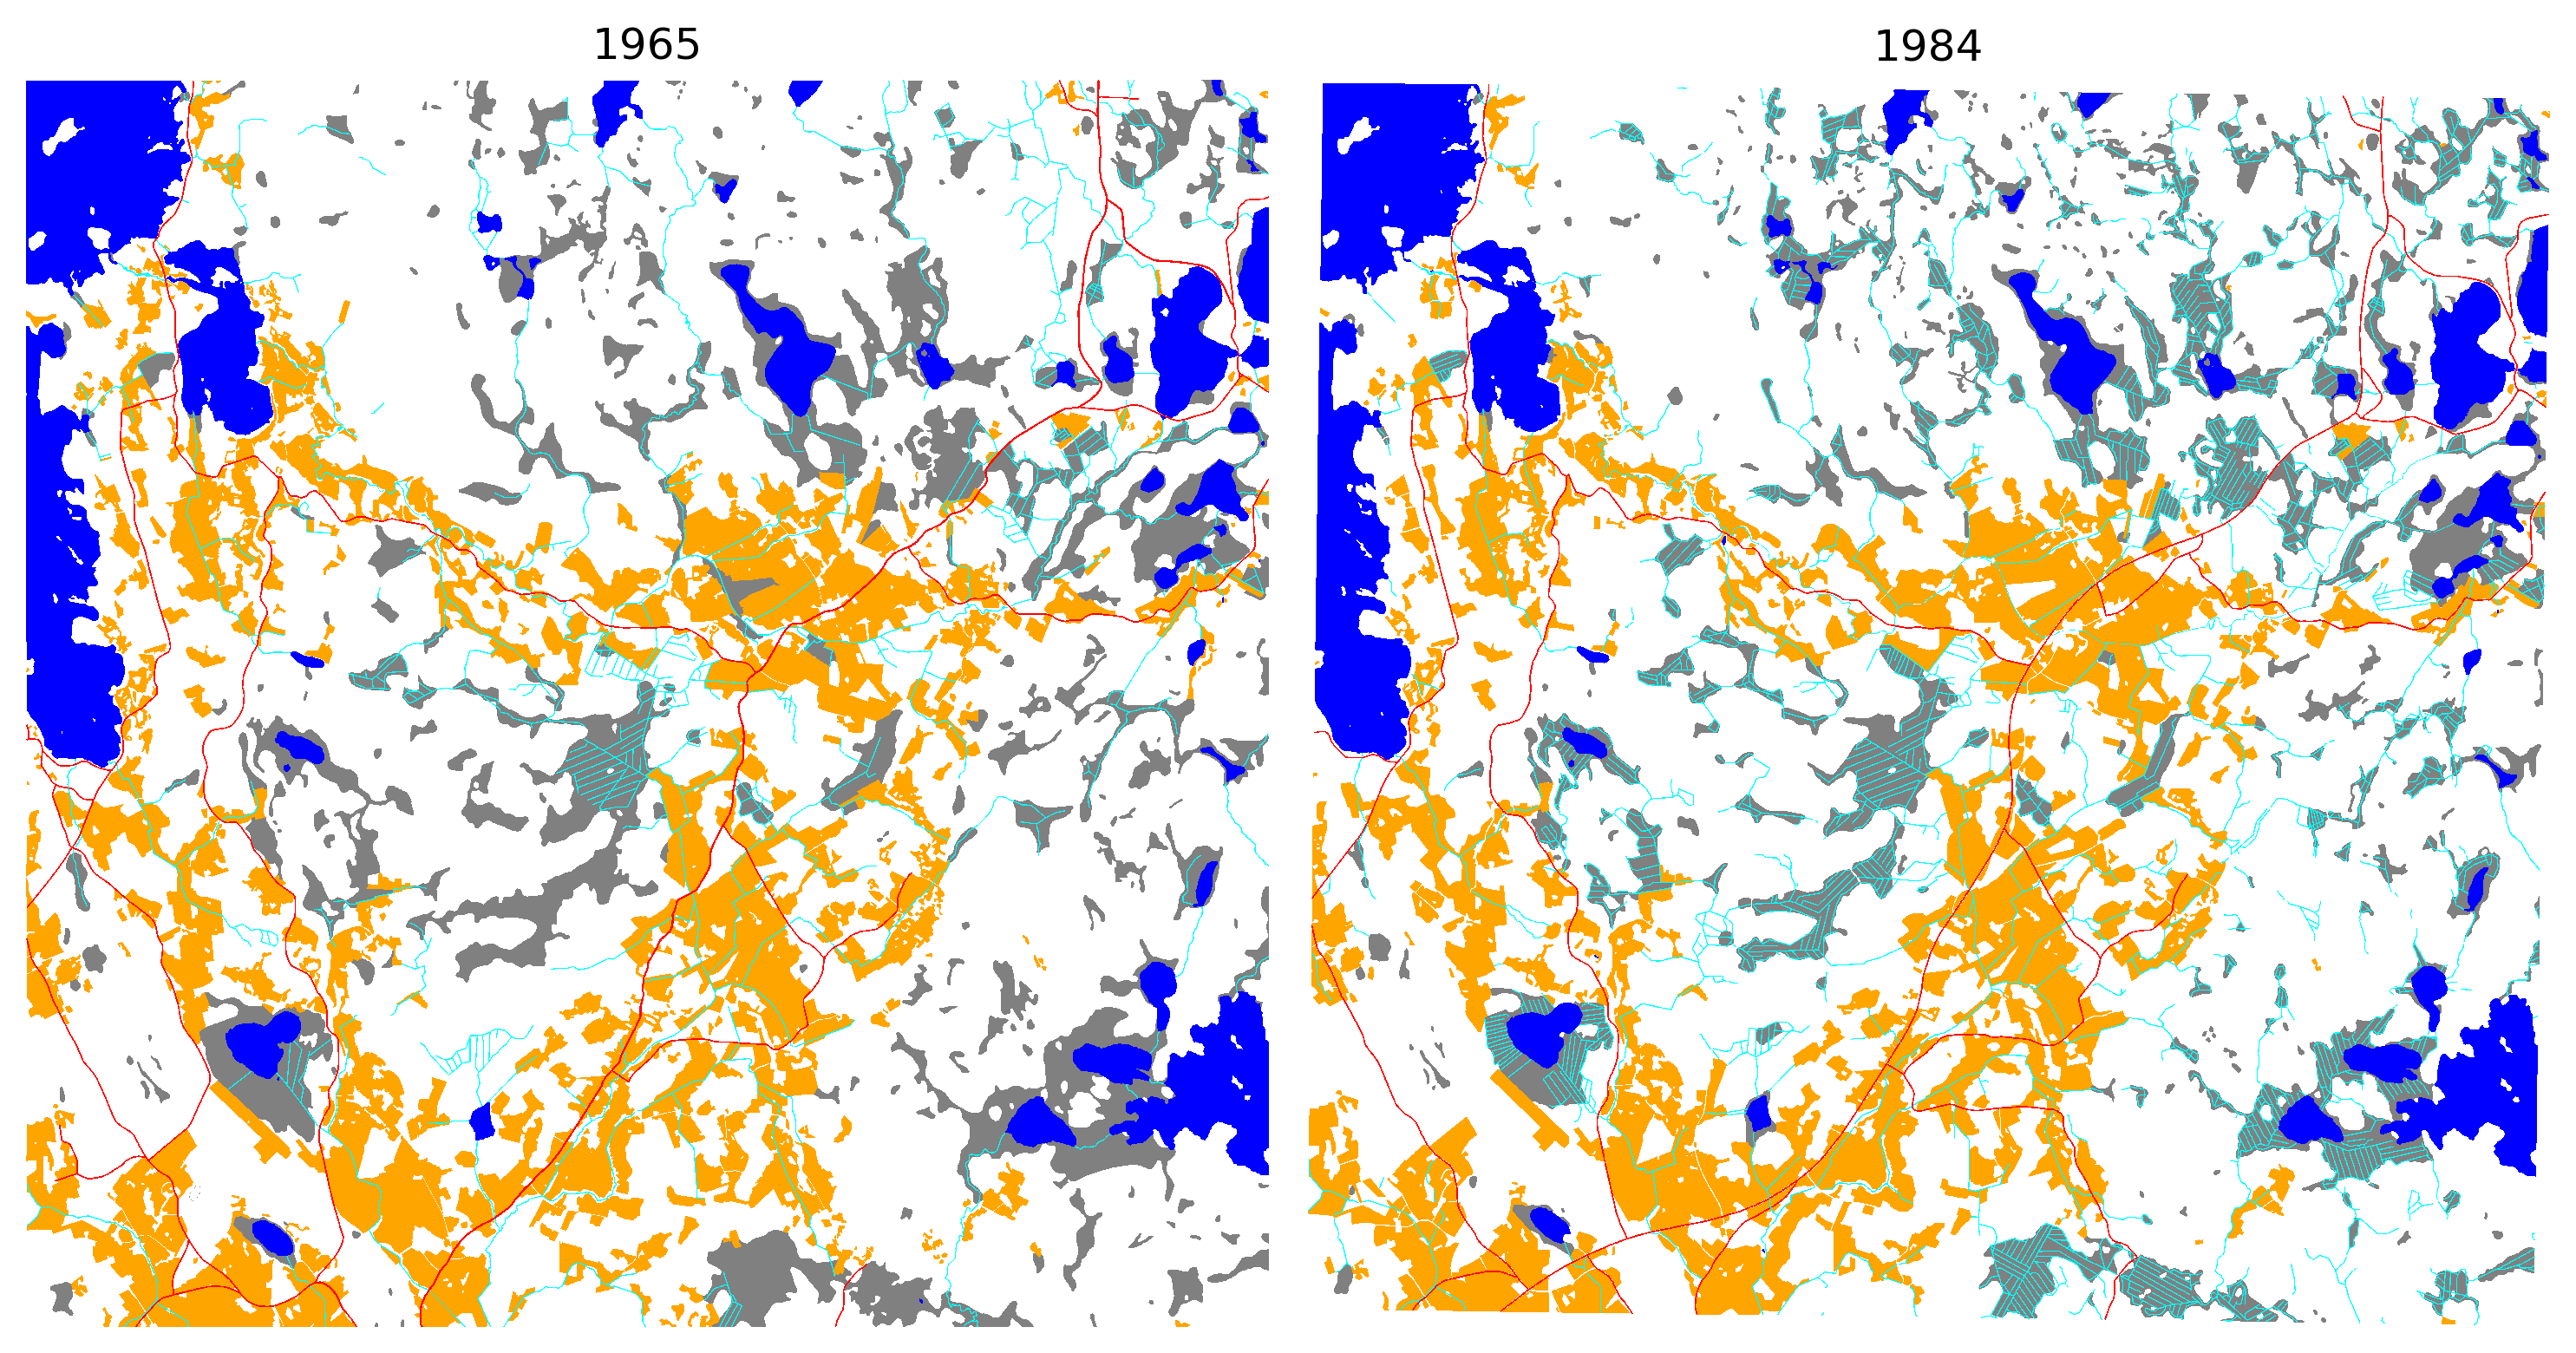

In [ ]:
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'orange', 'grey', 'red', 'cyan', 'blue'])
bounds=[0,1,2,3,4,5]
norm = colors.BoundaryNorm(bounds, cmap.N)
mask_65 = cv2.imread(str(ref_path/'combined_mask_1965.png'),0)
mask_84 = cv2.imread(str(ref_path/'combined_mask_1984.png'),0)
fig, axs = plt.subplots(1,2, figsize=(10,6), dpi=300)
for a in axs: a.axis('off')
axs[0].imshow(mask_65, vmin=0, vmax=5, cmap=cmap, interpolation='none')
axs[0].set_title('1965')
axs[1].imshow(mask_84, vmin=0, vmax=5, cmap=cmap, interpolation='none')
axs[1].set_title('1984')
plt.tight_layout()
plt.show()

# Georeference masks

Use the corresponding cropped ground control points to georeference these masks, so that tiling and demosaicing is easier.

In [ ]:
from osgeo import gdal
from pyproj import CRS, Transformer
import pandas as pd

In [ ]:
#| output: false

gcps = pd.read_csv(f'../data/gcps/cropped/213405_1965.jpg.points')
in_crs = CRS('EPSG:4326')
out_crs = CRS('EPSG:3067')
transformer = Transformer.from_crs(in_crs, out_crs, always_xy=True)
gcp_list = []
for row in gcps.itertuples():
    tfmd_x, tfmd_y = transformer.transform(row.mapX, row.mapY)
    gcp_list.append(gdal.GCP(tfmd_x, tfmd_y, 1, row.pixelX, row.pixelY))

translate_kwargs = {
    'GCPs': gcp_list,
    'format': 'GTIFF',
    'bandList': [1],
    'outputType': gdal.gdalconst.GDT_Int16
}

inpath = '../data/reference_masks/combined_mask_1965.png'
outpath = '../data/reference_masks/combined_mask_1965.tif'

gdal.Translate(outpath, inpath, **translate_kwargs)
gdal.Warp(outpath, outpath, options='-r near -tps -co COMPRESS=LZW -t_srs EPSG:3067')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *'> >

In [ ]:
#| output: false

gcps = pd.read_csv(f'../data/gcps/cropped/213405_1984.jpg.points')
in_crs = CRS('EPSG:4326')
out_crs = CRS('EPSG:3067')
transformer = Transformer.from_crs(in_crs, out_crs, always_xy=True)
gcp_list = []
for row in gcps.itertuples():
    tfmd_x, tfmd_y = transformer.transform(row.mapX, row.mapY)
    gcp_list.append(gdal.GCP(tfmd_x, tfmd_y, 1, row.pixelX, row.pixelY))

translate_kwargs = {
    'GCPs': gcp_list,
    'format': 'GTIFF',
    'bandList': [1],
    'outputType': gdal.gdalconst.GDT_Int16
}

inpath = '../data/reference_masks/combined_mask_1984.png'
outpath = '../data/reference_masks/combined_mask_1984.tif'

gdal.Translate(outpath, inpath, **translate_kwargs)
gdal.Warp(outpath, outpath, options='-r near -tps -co COMPRESS=LZW -t_srs EPSG:3067')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *'> >

After georeferencing the masks are correctly aligned.

In [ ]:
import rasterio as rio
import rasterio.plot as rioplot

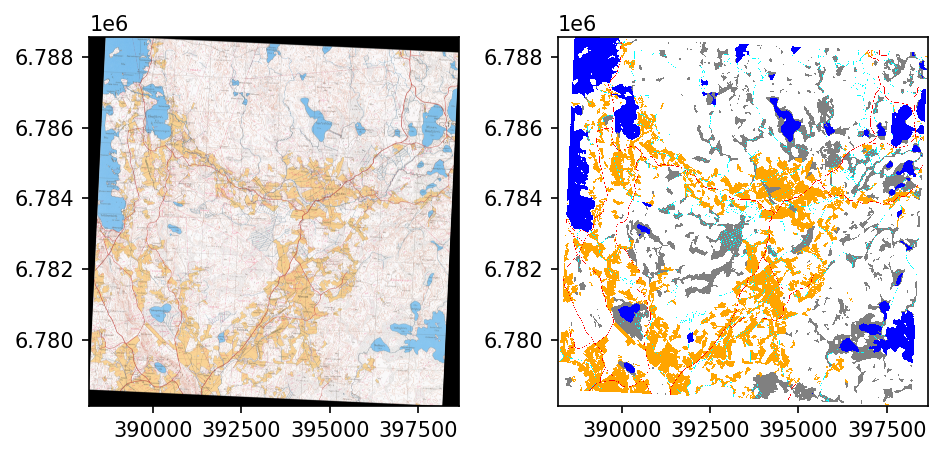

In [ ]:
fig, ax = plt.subplots(1,2, dpi=150)
refmap = rio.open('../data/maps/aligned_maps/213405_1965.tif')
rioplot.show(refmap, ax=ax[0])
refmap.close()
refmask = rio.open('../data/reference_masks/combined_mask_1965.tif')
rioplot.show(refmask, ax=ax[1], cmap=cmap, vmin=0, vmax=5, interpolation='none')
refmask.close()
plt.tight_layout()
plt.show()

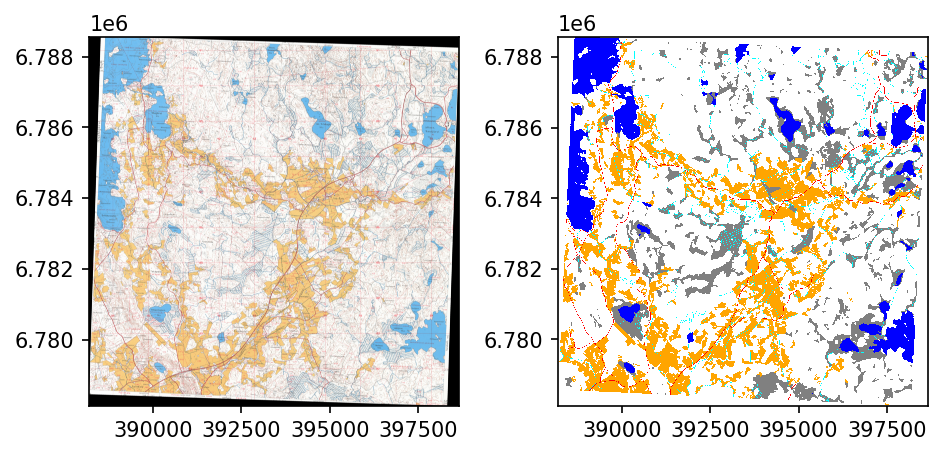

In [ ]:
fig, ax = plt.subplots(1,2, dpi=150)
refmap = rio.open('../data/maps/aligned_maps/213405_1984.tif')
rioplot.show(refmap, ax=ax[0])
refmap.close()
refmask = rio.open('../data/reference_masks/combined_mask_1965.tif')
rioplot.show(refmask, ax=ax[1], cmap=cmap, vmin=0, vmax=5, interpolation='none')
refmask.close()
plt.tight_layout()
plt.show()

# Tile masks and reference map

Use around half of the map as training and validation data and rest as test data.

In [ ]:
from rasterio.windows import Window

In [ ]:
years = ['1965', '1984']

Resulting georeferenced images are 6167x6167 pixels, so with 256x256 pixel images, 24x24 grid can be extracted.

Split tiles in 75:25 ratio such that western 24x16 grid is used as training data and eastern 8x24 is used as validation data.

In [ ]:
for year in years:
    with rio.open(f'../data/reference_masks/combined_mask_{year}.tif') as src:
        trainwin = Window.from_slices((0, 256*24), (0, 256*16))
        valwin = Window.from_slices((0, 256*24), (256*16, 256*24))
        orig_prof = src.profile
        prof = src.profile
        prof.update({
            'height': trainwin.height,
            'width': trainwin.width,
            'transform': rio.windows.transform(trainwin, src.transform)
        })
        with rio.open(f'../data/reference_masks/train_mask_{year}.tif', 'w', **prof) as dst:
            dst.write(src.read(window=trainwin))
        
        prof = src.profile
        prof.update({
            'height': valwin.height,
            'width': valwin.width,
            'transform': rio.windows.transform(valwin, src.transform)
        })
        with rio.open(f'../data/reference_masks/val_mask_{year}.tif', 'w', **prof) as dst:
            dst.write(src.read(window=valwin))
            
    with rio.open(f'../data/maps/aligned_maps/213405_{year}.tif') as src:
        trainwin = Window.from_slices((0, 256*24), (0, 256*16))
        valwin = Window.from_slices((0, 256*24), (256*16, 256*24))
        prof = src.profile
        prof.update({
            'height': trainwin.height,
            'width': trainwin.width,
            'transform': rio.windows.transform(trainwin, src.transform)
        })
        with rio.open(f'../data/reference_masks/train_im_{year}.tif', 'w', **prof) as dst:
            dst.write(src.read(window=trainwin))
        
        prof = src.profile
        prof.update({
            'height': valwin.height,
            'width': valwin.width,
            'transform': rio.windows.transform(valwin, src.transform)
        })
        with rio.open(f'../data/reference_masks/val_im_{year}.tif', 'w', **prof) as dst:
            dst.write(src.read(window=valwin))

Tile our training data and validation data, using `Tiler` from [drone_detector](https://github.com/mayrajeo/drone_detector/) package.

In [ ]:
from drone_detector.processing.tiling import Tiler
import random

In [ ]:
#| output: false

for year in years:
    tilesize = 256
    outpath = Path(f'../data/processed/train/{year}')
    trainmap_fn = f'../data/reference_masks/train_im_{year}.tif'
    trainmask_fn = f'../data/reference_masks/train_mask_{year}.tif'
    map_tiler = Tiler(outpath=outpath, gridsize_x=tilesize, gridsize_y=tilesize, overlap=(0,0))
    map_tiler.tile_raster(trainmap_fn)
    map_tiler.raster_path = outpath/'mask_tiles'
    map_tiler.tile_raster(trainmask_fn)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Show a few example patches for the training data.

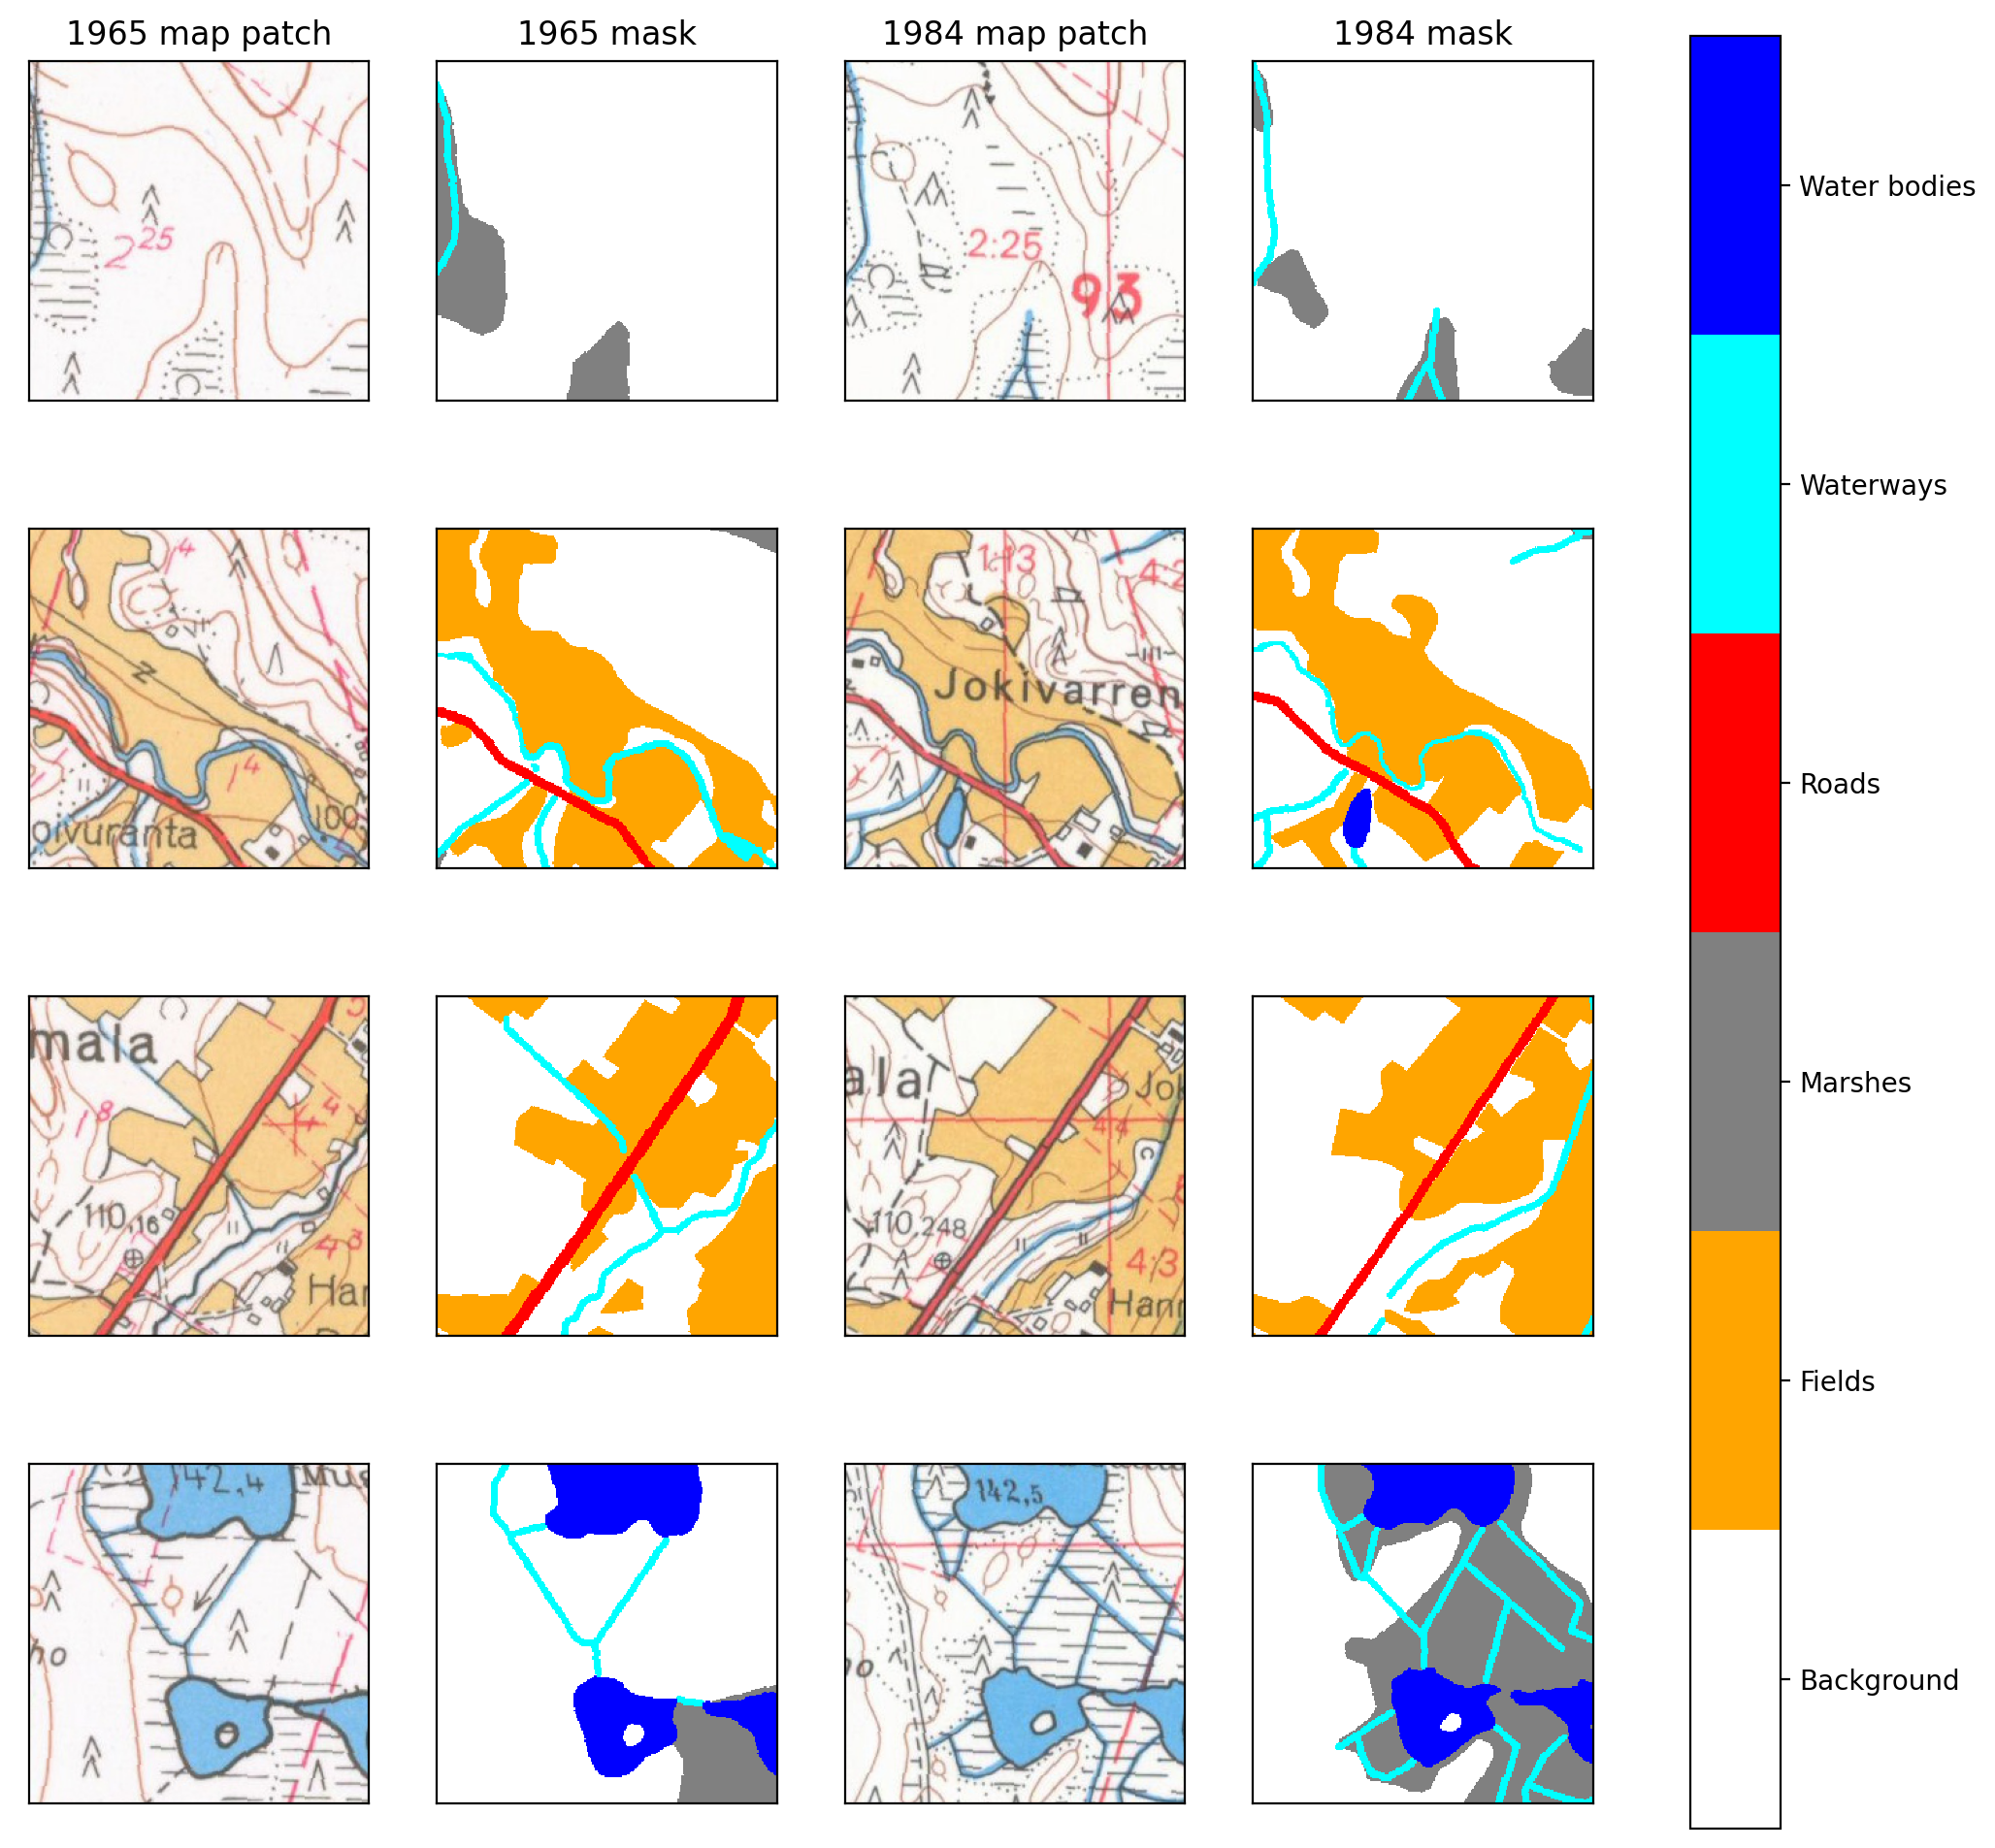

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(13,12), dpi=200)

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

axs[0,0].set_title('1965 map patch')
axs[0,1].set_title('1965 mask')
axs[0,2].set_title('1984 map patch')
axs[0,3].set_title('1984 mask')
    
for i in range(4):

    ex_file = random.sample(os.listdir('../data/processed/train/1965/raster_tiles/'), 1)[0]

    with rio.open(f"../data/processed/train/1965/raster_tiles/{ex_file}") as im:
        rioplot.show(im, ax=axs[i,0])
    with rio.open(f"../data/processed/train/1965/mask_tiles/{ex_file}") as mask:
        rioplot.show(mask, ax=axs[i,1], cmap=cmap, interpolation='none', vmin=0, vmax=5)
        maskvals = mask.read()

    with rio.open(f"../data/processed/train/1984/raster_tiles/{ex_file}") as im:
        rioplot.show(im, ax=axs[i,2])
    with rio.open(f"../data/processed/train/1984/mask_tiles/{ex_file}") as mask:
        rioplot.show(mask, ax=axs[i,3], cmap=cmap, interpolation='none', vmin=0, vmax=5)
        maskvals = mask.read()
        
norm = colors.Normalize(vmin=0,vmax=6)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), ticks=np.arange(0.5,6.5))
cbar.ax.set_yticklabels(['Background', 'Fields', 'Marshes', 'Roads', 'Waterways', 'Water bodies'])

plt.savefig('../data/figures/example_patches.jpg', dpi=300, bbox_inches='tight')
plt.show()


Do the same for test set and visualize them also.

In [ ]:
#| output: false

for year in years:
    tilesize = 256
    outpath = Path(f'../data/processed/val/{year}')
    valmap_fn = f'../data/reference_masks/val_im_{year}.tif'
    valmask_fn = f'../data/reference_masks/val_mask_{year}.tif'
    map_tiler = Tiler(outpath=outpath, gridsize_x=tilesize, gridsize_y=tilesize, overlap=(0,0))
    map_tiler.tile_raster(valmap_fn)
    map_tiler.raster_path = outpath/'mask_tiles'
    map_tiler.tile_raster(valmask_fn)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

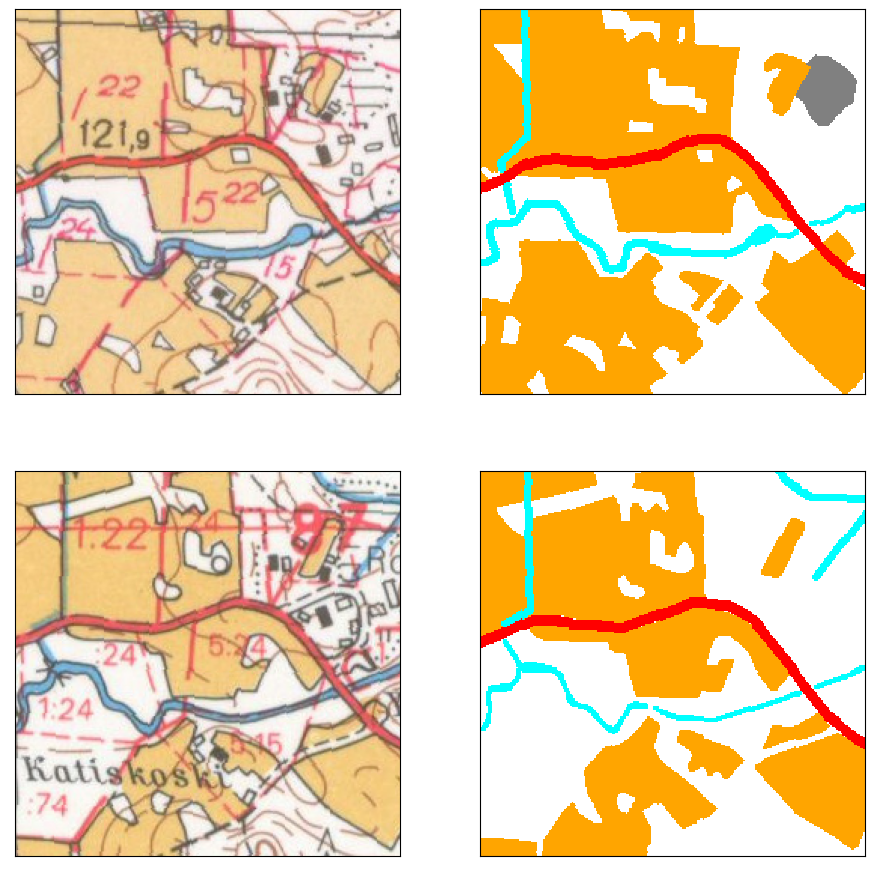

In [ ]:
ex_file = random.sample(os.listdir('../data/processed/val/1965/raster_tiles/'), 1)[0]
fig, axs = plt.subplots(2,2, figsize=(11,11))
for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])
with rio.open(f"../data/processed/val/1965/raster_tiles/{ex_file}") as im:
    rioplot.show(im, ax=axs[0,0])
with rio.open(f"../data/processed/val/1965/mask_tiles/{ex_file}") as mask:
    rioplot.show(mask, ax=axs[0,1], cmap=cmap, interpolation='none', vmin=0, vmax=5)
    maskvals = mask.read()

with rio.open(f"../data/processed/val/1984/raster_tiles/{ex_file}") as im:
    rioplot.show(im, ax=axs[1,0])
with rio.open(f"../data/processed/val/1984/mask_tiles/{ex_file}") as mask:
    rioplot.show(mask, ax=axs[1,1], cmap=cmap, interpolation='none', vmin=0, vmax=5)
    maskvals = mask.read()